In [4]:
import pandas as pd

# raw_data = pd.read_csv(r"C:\Repos\reddit-capstone\reddit-capstone\reddit-capstone\reddit_news_2017_all.csv", encoding = "utf-8", low_memory=False)

uplifting2016_raw = pd.read_csv(r"C:\Repos\reddit-capstone\reddit-capstone\reddit-capstone\reddit_upliftingnews_2016_all.csv", encoding = "utf-8", low_memory=False)
uplifting2017_raw = pd.read_csv(r"C:\Repos\reddit-capstone\reddit-capstone\reddit-capstone\reddit_upliftingnews_2017_all.csv", encoding = "utf-8", low_memory=False)
raw_data = uplifting2016_raw.append(uplifting2017_raw, ignore_index=True)

raw_data.iloc[:10,:]

,Unnamed: 0,author,created_utc,domain,id,locked,num_comments,permalink,score,subreddit,title,url,created
0,0,[deleted],1451635580,humanity.global,3z01jm,False,4,/r/UpliftingNews/comments/3z01jm/happy_new_yea...,1,UpliftingNews,"Happy New Year reddit! :) I quit retirement, s...",https://Humanity.global/Discover,1.451650e+09
1,1,A-Human-Like-You,1451637423,humanity.global,3z03lk,False,9,/r/UpliftingNews/comments/3z03lk/happy_new_yea...,0,UpliftingNews,"Happy New Year reddit! :) I quit retirement, s...",https://Humanity.global/Discover,1.451652e+09
2,2,jimrosenz,1451644339,theatlantic.com,3z0aou,False,3,/r/UpliftingNews/comments/3z0aou/2015_the_best...,21,UpliftingNews,2015: The Best Year in History for the Average...,http://www.theatlantic.com/international/archi...,1.451659e+09
3,3,[deleted],1451658360,edition.cnn.com,3z0q9o,False,39,/r/UpliftingNews/comments/3z0q9o/obama_to_anno...,0,UpliftingNews,Obama to announce new executive action on guns,http://edition.cnn.com/2015/12/31/politics/oba...,1.451673e+09
4,4,[deleted],1451660909,dailymail.co.uk,3z0u23,False,5,/r/UpliftingNews/comments/3z0u23/deaf_man_save...,25,UpliftingNews,Deaf man saves deer from frozen river,http://www.dailymail.co.uk/news/article-338113...,1.451675e+09
5,5,ceejface,1451667932,duluthnewstribune.com,3z16kk,False,110,/r/UpliftingNews/comments/3z16kk/remember_that...,2162,UpliftingNews,Remember that deaf guy who saved and pet the d...,http://www.duluthnewstribune.com/news/3915329-...,1.451682e+09
6,6,harrisknows,1451692703,ucg.org,3z2qkq,False,1,/r/UpliftingNews/comments/3z2qkq/living_beyond...,1,UpliftingNews,Living Beyond Today | United Church of God,http://www.ucg.org/beyond-today/beyond-today-t...,1.451707e+09
7,7,Ringbearer31,1451693011,fox4kc.com,3z2r93,False,3,/r/UpliftingNews/comments/3z2r93/small_surpris...,8,UpliftingNews,Small surprise in Redbox movie case brings imm...,http://fox4kc.com/2015/12/29/small-surprise-in...,1.451707e+09
8,8,RoverVideo,1451701815,youtube.com,3z39ps,False,1,/r/UpliftingNews/comments/3z39ps/beyond_restor...,1,UpliftingNews,Beyond Restoration,https://www.youtube.com/attribution_link?a=hOZ...,1.451716e+09
9,9,[deleted],1451703829,time.com,3z3dzy,False,207,/r/UpliftingNews/comments/3z3dzy/arizona_girl_...,3272,UpliftingNews,"Arizona Girl, 12, Collects 1,000 Coats for the...",http://time.com/4165341/arizona-girl-coats-hom...,1.451718e+09


In [5]:
import pandas_profiling

pandas_profiling.ProfileReport(raw_data)


Number of variables,13
Number of observations,48524
Total Missing (%),0.0%
Total size in memory,4.5 MiB
Average record size in memory,97.0 B
Numeric,4
Categorical,6
Boolean,1
Date,0
Text (Unique),0
Rejected,2


In [9]:
import datetime as dt

# 99.9% missing, so not useful
raw_data_2 = raw_data#.drop(["author_flair_text"], axis = "columns")

# same information as created, redundant
raw_data_2 = raw_data_2.drop(["created_utc"], axis = "columns")

# constant value ("news")
raw_data_2 = raw_data_2.drop(["subreddit"], axis = "columns")

#convert created column to readable date (from unixtime)
raw_data_2["created"] = pd.to_datetime(raw_data_2["created"], unit = 's', errors='ignore')

# want at least 2 comments (most of the 1-comments are spam, same as no comments)
reddit_submissions = raw_data_2[raw_data_2["num_comments"]>1]

# drop duplicate submissions (by title), keeping the one with the most comments
reddit_submissions.sort_values(by="num_comments", ascending=False, inplace=True)
reddit_submissions.drop_duplicates(subset=["title"], keep = "first", inplace = True)
reddit_submissions.sort_values(by="created", ascending=True, inplace=True)  # sort chronologically

# make sure everthing looks good
reddit_submissions.head(40)

# output to csv for use elsewhere (eg tableau)
reddit_submissions.to_csv(r"C:\Repos\reddit-capstone\reddit-capstone\reddit-capstone\data\redditupliftingnews1617_clean.csv")


C:\Users\zande\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\zande\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\zande\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Unnamed: 0,author,domain,id,locked,num_comments,permalink,score,title,url,created
128,128,A-Human-Like-You,humanity.global,3z03lk,False,9,/r/UpliftingNews/comments/3z03lk/happy_new_yea...,0,"Happy New Year reddit! :) I quit retirement, s...",https://Humanity.global/Discover,2016-01-01 12:37:03
2,2,jimrosenz,theatlantic.com,3z0aou,False,3,/r/UpliftingNews/comments/3z0aou/2015_the_best...,21,2015: The Best Year in History for the Average...,http://www.theatlantic.com/international/archi...,2016-01-01 14:32:19
3,3,[deleted],edition.cnn.com,3z0q9o,False,39,/r/UpliftingNews/comments/3z0q9o/obama_to_anno...,0,Obama to announce new executive action on guns,http://edition.cnn.com/2015/12/31/politics/oba...,2016-01-01 18:26:00
4,4,[deleted],dailymail.co.uk,3z0u23,False,5,/r/UpliftingNews/comments/3z0u23/deaf_man_save...,25,Deaf man saves deer from frozen river,http://www.dailymail.co.uk/news/article-338113...,2016-01-01 19:08:29
132,132,ceejface,duluthnewstribune.com,3z16kk,False,110,/r/UpliftingNews/comments/3z16kk/remember_that...,2162,Remember that deaf guy who saved and pet the d...,http://www.duluthnewstribune.com/news/3915329-...,2016-01-01 21:05:32
7,7,Ringbearer31,fox4kc.com,3z2r93,False,3,/r/UpliftingNews/comments/3z2r93/small_surpris...,8,Small surprise in Redbox movie case brings imm...,http://fox4kc.com/2015/12/29/small-surprise-in...,2016-01-02 04:03:31
9,9,[deleted],time.com,3z3dzy,False,207,/r/UpliftingNews/comments/3z3dzy/arizona_girl_...,3272,"Arizona Girl, 12, Collects 1,000 Coats for the...",http://time.com/4165341/arizona-girl-coats-hom...,2016-01-02 07:03:49
10,10,Loodiyak,facebook.com,3z3uhy,False,3,/r/UpliftingNews/comments/3z3uhy/league_of_leg...,9,League of Legends streamer's life saved after ...,https://www.facebook.com/HiImGosu/posts/104828...,2016-01-02 09:22:52
138,138,dustofoblivion123,dailymail.co.uk,3z3zz0,False,5,/r/UpliftingNews/comments/3z3zz0/russia_unveil...,42,Russia unveils its body armour for DOGS follow...,http://www.dailymail.co.uk/news/article-333666...,2016-01-02 10:11:33
17,17,coolwhipsando,caledonenterprise.com,3z4xhq,False,2,/r/UpliftingNews/comments/3z4xhq/lost_parrot_r...,62,Lost parrot reunited with family after hitchin...,http://www.caledonenterprise.com/news-story/62...,2016-01-02 16:38:26


In [168]:
# take a second look at the summary statistics
pandas_profiling.ProfileReport(reddit_submissions)

Number of variables,13
Number of observations,34608
Total Missing (%),0.0%
Total size in memory,2.7 MiB
Average record size in memory,83.0 B
Numeric,3
Categorical,3
Boolean,3
Date,1
Text (Unique),3
Rejected,0


C:\Users\zande\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  if sys.path[0] == '':


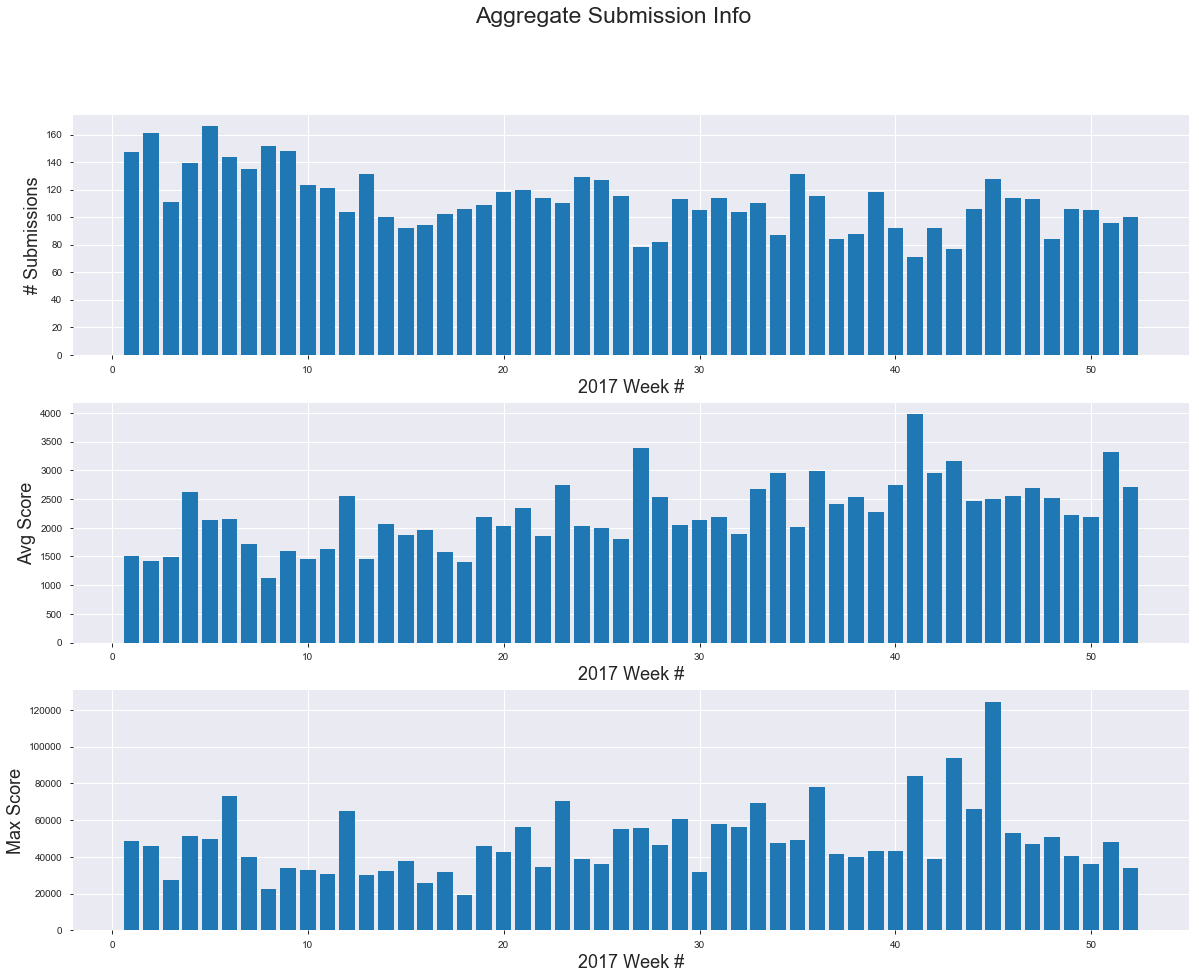

In [10]:
# count of scores/comments per day/week to correlate with major news events (primarily USA)

import time
import numpy as np
import matplotlib.pyplot as plt

# to show plot output in notebook
%matplotlib inline

date_info = reddit_submissions.copy()
# remove Subnday Jan 1st - part of 52nd week of 2016; could shift, but then Sun Dec 31 2017 would be pushed out (want 52 weeks)
date_info = date_info[date_info["created"]>=dt.date(2017,1,2)] 
date_info["week"] = date_info["created"].dt.week
date_info["month"] = date_info["created"].dt.month

num_comments_by_week = date_info.groupby(['week'])['score'].agg(['count','sum','mean','max'])

LABEL_SIZE = 18
X_LABEL = "2017 Week #"

fig = plt.figure(figsize=(20,15))
fig.add_subplot(3,1,1)
plt.suptitle("Aggregate Submission Info", fontsize = LABEL_SIZE+5)
plt.bar(num_comments_by_week.index, num_comments_by_week["count"])

# plt.xticks(range(5,260,22), calendar.month_name[1:13], rotation=20)
plt.ylabel('# Submissions', fontsize=LABEL_SIZE)
plt.xlabel(X_LABEL, fontsize=LABEL_SIZE)

fig.add_subplot(3,1,2)
plt.bar(num_comments_by_week.index, num_comments_by_week["mean"])

plt.ylabel('Avg Score', fontsize=LABEL_SIZE)
plt.xlabel(X_LABEL, fontsize=LABEL_SIZE)

fig.add_subplot(3,1,3)
plt.bar(num_comments_by_week.index, num_comments_by_week["max"])

plt.ylabel('Max Score', fontsize=LABEL_SIZE)
plt.xlabel(X_LABEL, fontsize=LABEL_SIZE)



In [16]:
# tokenize titles

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r"\w+")

reddit_submissions.loc[:,"title"] = reddit_submissions["title"].replace("’|'|-|,|\.|\|", "", regex=True)

# don't care about case for now
reddit_submissions["title"] = reddit_submissions["title"].str.lower()
reddit_submissions.head(100)

titles = reddit_submissions["title"]
title_tokens = titles.apply(tokenizer.tokenize)

reddit_submissions["tokenized_title"] = reddit_submissions["title"].apply(tokenizer.tokenize)

reddit_submissions.head(20)

C:\Users\zande\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\zande\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\zande\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,Unnamed: 0,author,domain,id,locked,num_comments,permalink,score,title,url,created,tokenized_title
128,128,A-Human-Like-You,humanity.global,3z03lk,False,9,/r/UpliftingNews/comments/3z03lk/happy_new_yea...,0,happy new year reddit! :) i quit retirement sp...,https://Humanity.global/Discover,2016-01-01 12:37:03,"[happy, new, year, reddit, i, quit, retirement..."
2,2,jimrosenz,theatlantic.com,3z0aou,False,3,/r/UpliftingNews/comments/3z0aou/2015_the_best...,21,2015: the best year in history for the average...,http://www.theatlantic.com/international/archi...,2016-01-01 14:32:19,"[2015, the, best, year, in, history, for, the,..."
3,3,[deleted],edition.cnn.com,3z0q9o,False,39,/r/UpliftingNews/comments/3z0q9o/obama_to_anno...,0,obama to announce new executive action on guns,http://edition.cnn.com/2015/12/31/politics/oba...,2016-01-01 18:26:00,"[obama, to, announce, new, executive, action, ..."
4,4,[deleted],dailymail.co.uk,3z0u23,False,5,/r/UpliftingNews/comments/3z0u23/deaf_man_save...,25,deaf man saves deer from frozen river,http://www.dailymail.co.uk/news/article-338113...,2016-01-01 19:08:29,"[deaf, man, saves, deer, from, frozen, river]"
132,132,ceejface,duluthnewstribune.com,3z16kk,False,110,/r/UpliftingNews/comments/3z16kk/remember_that...,2162,remember that deaf guy who saved and pet the d...,http://www.duluthnewstribune.com/news/3915329-...,2016-01-01 21:05:32,"[remember, that, deaf, guy, who, saved, and, p..."
7,7,Ringbearer31,fox4kc.com,3z2r93,False,3,/r/UpliftingNews/comments/3z2r93/small_surpris...,8,small surprise in redbox movie case brings imm...,http://fox4kc.com/2015/12/29/small-surprise-in...,2016-01-02 04:03:31,"[small, surprise, in, redbox, movie, case, bri..."
9,9,[deleted],time.com,3z3dzy,False,207,/r/UpliftingNews/comments/3z3dzy/arizona_girl_...,3272,arizona girl 12 collects 1000 coats for the ho...,http://time.com/4165341/arizona-girl-coats-hom...,2016-01-02 07:03:49,"[arizona, girl, 12, collects, 1000, coats, for..."
10,10,Loodiyak,facebook.com,3z3uhy,False,3,/r/UpliftingNews/comments/3z3uhy/league_of_leg...,9,league of legends streamers life saved after s...,https://www.facebook.com/HiImGosu/posts/104828...,2016-01-02 09:22:52,"[league, of, legends, streamers, life, saved, ..."
138,138,dustofoblivion123,dailymail.co.uk,3z3zz0,False,5,/r/UpliftingNews/comments/3z3zz0/russia_unveil...,42,russia unveils its body armour for dogs follow...,http://www.dailymail.co.uk/news/article-333666...,2016-01-02 10:11:33,"[russia, unveils, its, body, armour, for, dogs..."
17,17,coolwhipsando,caledonenterprise.com,3z4xhq,False,2,/r/UpliftingNews/comments/3z4xhq/lost_parrot_r...,62,lost parrot reunited with family after hitchin...,http://www.caledonenterprise.com/news-story/62...,2016-01-02 16:38:26,"[lost, parrot, reunited, with, family, after, ..."


In [18]:
# Frequency of keywords overall
import nltk
from collections import Counter

nltk.download("stopwords")

from nltk.corpus import stopwords

# a collection of common words such as "the", "a", "be", etc.
# may be useful in distinguishing keywords relating to the subject matter
s = set(stopwords.words('english'))

titles_kws = titles.apply(lambda title: [word for word in title.split() if word not in s])
#create column in reddit_submissions
reddit_submissions["tokenized_title"] = reddit_submissions["tokenized_title"].apply(
    lambda title: [word for word in title if word not in s])

titles_kws = titles_kws.apply(lambda t: ' '.join(t))

overall_freq = Counter(" ".join(titles_kws).split())

overall_freq.most_common(30)

freq_df = pd.DataFrame.from_dict(dict(overall_freq), orient="index", columns = ["count"])

# freq_df.to_csv(r"C:\Repos\reddit-capstone\reddit-capstone\reddit-capstone\data\redditnews2017_wordfreq.csv")

freq_df.head(40)
overall_freq.most_common(30)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zande\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


C:\Users\zande\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


[('man', 841),
 ('dog', 543),
 ('new', 540),
 ('woman', 518),
 ('years', 514),
 ('first', 462),
 ('boy', 432),
 ('help', 375),
 ('girl', 373),
 ('homeless', 372),
 ('life', 348),
 ('school', 347),
 ('police', 344),
 ('year', 338),
 ('people', 312),
 ('us', 301),
 ('free', 289),
 ('home', 288),
 ('gets', 274),
 ('one', 266),
 ('old', 257),
 ('family', 254),
 ('found', 253),
 ('day', 243),
 ('save', 239),
 ('cancer', 238),
 ('baby', 228),
 ('million', 228),
 ('time', 221),
 ('children', 209)]

In [172]:
reddit_submissions["score"] += 1  # Laplace smoothing to avoid 0 ratio

# low ratio indicates a controversial/unpopular topic
# high ratio indicates something users agree on/find important
reddit_submissions["score_comment_ratio"] = reddit_submissions["score"]/reddit_submissions["num_comments"]

TOP_N_TERMS = 1000

top_terms = dict(overall_freq.most_common(TOP_N_TERMS))
top_terms_df = pd.DataFrame.from_dict(top_terms, orient="index", columns = ["count"])
temp = reddit_submissions.copy()

top_terms_summary = pd.DataFrame()

for t in list(top_terms.keys()):
    temp["contains_term"] = temp.apply(lambda row: 1 if t in row["tokenized_title"] else 0, axis=1)
    temp_rows= temp.groupby(["contains_term"])["score", "score_comment_ratio"].agg(["mean", "count"])
    temp_rows.reset_index(drop=False, inplace=True)
    temp_rows.columns = ['_'.join(col).strip() for col in temp_rows.columns.values]
    temp_rows["term"] = t
    # append
    top_terms_summary = top_terms_summary.append(temp_rows, ignore_index=True)
top_terms_summary.drop(columns="score_comment_ratio_count", inplace=True)
top_terms_summary.rename(columns = {"score_count":"count", "contains_term_":"contains_term"}, inplace=True)
top_terms_summary.to_csv("C:\\Repos\\reddit-capstone\\reddit-capstone\\reddit-capstone\\data\\tokens_top"+str(TOP_N_TERMS)+"_summary.csv")
# top_terms_summary

C:\Users\zande\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\zande\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

reddit_submissions_2 = reddit_submissions.copy()
reddit_submissions_2["concise_title"] = reddit_submissions_2["tokenized_title"].apply(lambda tokens_list: ' '.join(tokens_list))

word_vectorizer = CountVectorizer(ngram_range=(1,3), analyzer='word')

sparse_matrix = word_vectorizer.fit_transform(reddit_submissions_2["concise_title"])
frequencies = sum(sparse_matrix).toarray()[0]
frequencies_2 = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])

In [29]:
frequencies_2.sort_values(by="frequency", ascending=False, inplace=True)

TOP_N_TERMS = 1000

top_terms = frequencies_2.head(TOP_N_TERMS)

temp = reddit_submissions.copy()

top_terms_summary = pd.DataFrame()

for t in list(top_terms.index):
    temp["contains_term"] = temp.apply(lambda row: 1 if t in row["tokenized_title"] else 0, axis=1)
    temp_rows= temp.groupby(["contains_term"])["score", "score_comment_ratio"].agg(["mean", "count"])
    temp_rows.reset_index(drop=False, inplace=True)
    temp_rows.columns = ['_'.join(col).strip() for col in temp_rows.columns.values]
    temp_rows["term"] = t
    # append
    top_terms_summary = top_terms_summary.append(temp_rows, ignore_index=True)

top_terms_summary.drop(columns="score_comment_ratio_count", inplace=True)
top_terms_summary.rename(columns = {"score_count":"count", "contains_term_":"contains_term"}, inplace=True)
top_terms_summary.to_csv("C:\\Repos\\reddit-capstone\\reddit-capstone\\reddit-capstone\\data\\tokens_top"+str(TOP_N_TERMS)+"_summary_3grams.csv")

                frequency
puerto rico            30
puerto                 38
rico                   30
net neutrality          8
net                    14
neutrality              8
